# Visualización de datos

Tenemos 3 datasets con información sobre el número de casos, muertes y recuperados de infecciones por COVID-19. Nos piden:

1. Preparar los datasets para crear visualizaciones
2. Explorar las distintas variables utilizando:
    - Gráficos de líneas
    - Gráficos de barras
    - Gráficos de dispersión
    - Gráficos de Pie/Donut
    - Mapas
    - Tablas
    
## Diccionario de datos

Los tres datasets están compuestos por dos partes:

1. Cuatro columnas con identificadores geográficos
2. El resto de columnas corresponden a la fecha para la cuál se midió esa variable.

## Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

## Leer datos

In [2]:
df_confirmed = pd.read_csv("data/covid19_confirmed_global.csv")
df_recovered = pd.read_csv("data/covid19_recovered_global.csv")
df_deaths = pd.read_csv("data/covid19_deaths_global.csv")

## Revisiones generales

In [4]:
df_confirmed.shape, df_recovered.shape, df_deaths.shape

((275, 478), (260, 478), (275, 478))

In [59]:
assert sorted(df_confirmed.columns[:4]) == sorted(df_recovered.columns[:4]) == sorted(df_deaths.columns[:4])

## Tratamiento de datos

In [60]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21
0,NaN,Afghanistan,33.94,67.71,0,0,0,0,0,0,...,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842
1,NaN,Albania,41.15,20.17,0,0,0,0,0,0,...,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723
2,NaN,Algeria,28.03,1.66,0,0,0,0,0,0,...,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104
3,NaN,Andorra,42.51,1.52,0,0,0,0,0,0,...,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423
4,NaN,Angola,-11.20,17.87,0,0,0,0,0,0,...,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740


In [3]:
df_confirmed_long = df_confirmed.melt(
    id_vars=df_confirmed.columns[:4],
    value_vars=df_confirmed.columns[4:],
    var_name="Date",
    value_name="Confirmed"
)

df_recovered_long = df_recovered.melt(
    id_vars=df_recovered.columns[:4],
    value_vars=df_recovered.columns[4:],
    var_name="Date",
    value_name="Recovered"
)

df_deaths_long = df_deaths.melt(
    id_vars=df_deaths.columns[:4],
    value_vars=df_recovered.columns[4:],
    var_name="Date",
    value_name="Deaths"
)

In [62]:
df_deaths_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.94,67.71,1/22/20,0
1,NaN,Albania,41.15,20.17,1/22/20,0
2,NaN,Algeria,28.03,1.66,1/22/20,0
3,NaN,Andorra,42.51,1.52,1/22/20,0
4,NaN,Angola,-11.20,17.87,1/22/20,0
...,...,...,...,...,...,...
130345,NaN,Vietnam,14.06,108.28,5/9/21,35
130346,NaN,West Bank and Gaza,31.95,35.23,5/9/21,3358
130347,NaN,Yemen,15.55,48.52,5/9/21,1271
130348,NaN,Zambia,-13.13,27.85,5/9/21,1257


In [63]:
df_confirmed_long.Confirmed.sum(), df_recovered_long.Recovered.sum(), df_deaths_long.Deaths.sum()

(22954245515, 13418990004, 555645002)

In [4]:
df_full = (
    df_confirmed_long
    .merge(
        right=df_recovered_long,
        on=["Province/State", "Country/Region", "Lat", "Long", "Date"]
    )
    .merge(
        right=df_deaths_long,
        on=["Province/State", "Country/Region", "Lat", "Long", "Date"]
    )
)

In [65]:
df_full.shape

(120396, 8)

In [66]:
df_full.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [5]:
df_full.rename(
    columns={"Province/State": "ProvinceState", "Country/Region": "CountryRegion"},
    inplace=True
)

In [68]:
df_full.head()

,ProvinceState,CountryRegion,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.94,67.71,1/22/20,0,0,0
1,NaN,Albania,41.15,20.17,1/22/20,0,0,0
2,NaN,Algeria,28.03,1.66,1/22/20,0,0,0
3,NaN,Andorra,42.51,1.52,1/22/20,0,0,0
4,NaN,Angola,-11.20,17.87,1/22/20,0,0,0


In [69]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120396 entries, 0 to 120395
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ProvinceState  32232 non-null   object 
 1   CountryRegion  120396 non-null  object 
 2   Lat            119922 non-null  float64
 3   Long           119922 non-null  float64
 4   Date           120396 non-null  object 
 5   Confirmed      120396 non-null  int64  
 6   Recovered      120396 non-null  int64  
 7   Deaths         120396 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 7.3+ MB


In [6]:
pd.set_option("display.float_format", "{:,.2f}".format)
df_full.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,"119,922.00","119,922.00","120,396.00","120,396.00","120,396.00"
mean,19.02,27.90,"189,169.05","110,165.12","4,569.61"
std,24.53,70.45,"1,255,978.83","654,123.03","25,596.99"
min,-51.80,-178.12,0.00,0.00,0.00
25%,4.86,-9.43,107.00,27.00,1.00
50%,19.31,22.94,"1,504.00",903.00,23.00
75%,39.07,88.09,"29,421.50","15,699.50",506.00
max,71.71,178.06,"32,707,750.00","18,671,222.00","581,754.00"


In [7]:
df_full["Date"] = pd.to_datetime(df_full["Date"], format="%m/%d/%y")

## Gráficos

Mejor forma de mostrar los siguientes datos:
- Fallecimientos acumulados de España
- Fallecimientos acumulados España, Italia y Portugal
- Fallecimientos totales (Italia, España, Portugal, Francia)
- Fallecimientos por países (Italia, España, Portugal) de la ultima semana de Diciembre de 2020
- Distribución de fallecimientos diarios reportados en España
- Relación entre fallecimientos y casos confirmados


### Line plot `pandas`

In [8]:
df_spain = df_full[df_full.CountryRegion == "Spain"]
df_spain.head()

,ProvinceState,CountryRegion,Lat,Long,Date,Confirmed,Recovered,Deaths
215,NaN,Spain,40.46,-3.75,2020-01-22,0,0,0
469,NaN,Spain,40.46,-3.75,2020-01-23,0,0,0
723,NaN,Spain,40.46,-3.75,2020-01-24,0,0,0
977,NaN,Spain,40.46,-3.75,2020-01-25,0,0,0
1231,NaN,Spain,40.46,-3.75,2020-01-26,0,0,0


#### Una serie

<Axes: title={'center': 'Acumulado de fallecidos - España'}, xlabel='Fecha', ylabel='Fallecidos'>

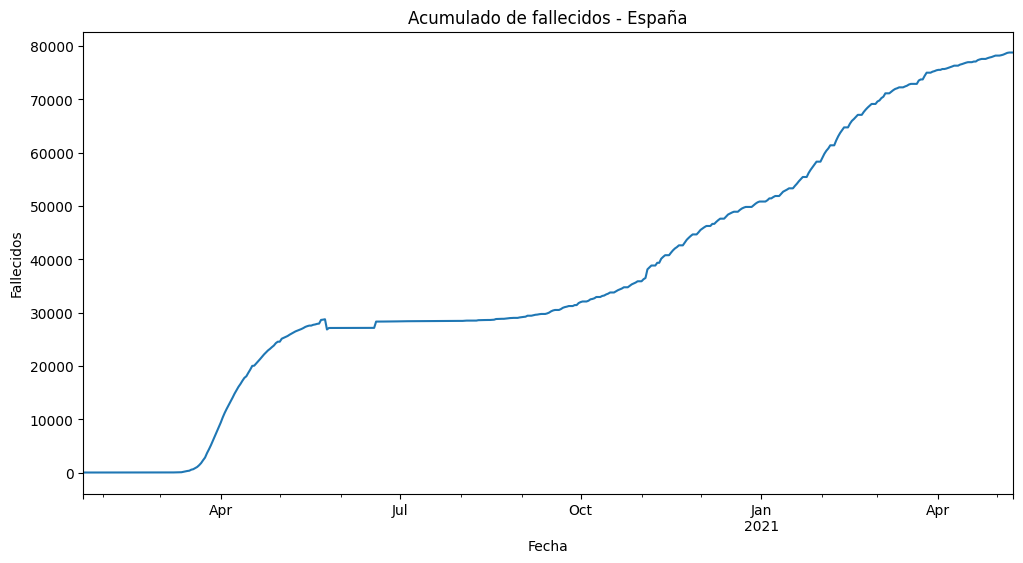

In [73]:
df_spain.plot(
    figsize=(12, 6),
    x="Date",
    y="Deaths",
    title="Acumulado de fallecidos - España",
    xlabel="Fecha",
    ylabel="Fallecidos",
    legend=None
)

#### Multiples series

In [9]:
df_multi = df_full[df_full.CountryRegion.isin(["Spain", "Portugal", "Italy"])]
df_multi

,ProvinceState,CountryRegion,Lat,Long,Date,Confirmed,Recovered,Deaths
135,NaN,Italy,41.87,12.57,2020-01-22,0,0,0
192,NaN,Portugal,39.40,-8.22,2020-01-22,0,0,0
215,NaN,Spain,40.46,-3.75,2020-01-22,0,0,0
389,NaN,Italy,41.87,12.57,2020-01-23,0,0,0
446,NaN,Portugal,39.40,-8.22,2020-01-23,0,0,0
...,...,...,...,...,...,...,...,...
120080,NaN,Portugal,39.40,-8.22,2021-05-08,839258,800007,16991
120103,NaN,Spain,40.46,-3.75,2021-05-08,3567408,150376,78792
120277,NaN,Italy,41.87,12.57,2021-05-09,4111210,3604523,122833
120334,NaN,Portugal,39.40,-8.22,2021-05-09,839582,800277,16992


In [10]:
df_multi_wide = (
    df_multi
    .pivot(index="Date", columns="CountryRegion", values="Deaths")
    .reset_index()
)

<Axes: title={'center': 'Fallecimientos acumulados - España, Italia, Portugal'}, xlabel='Fecha', ylabel='Fallecidos'>

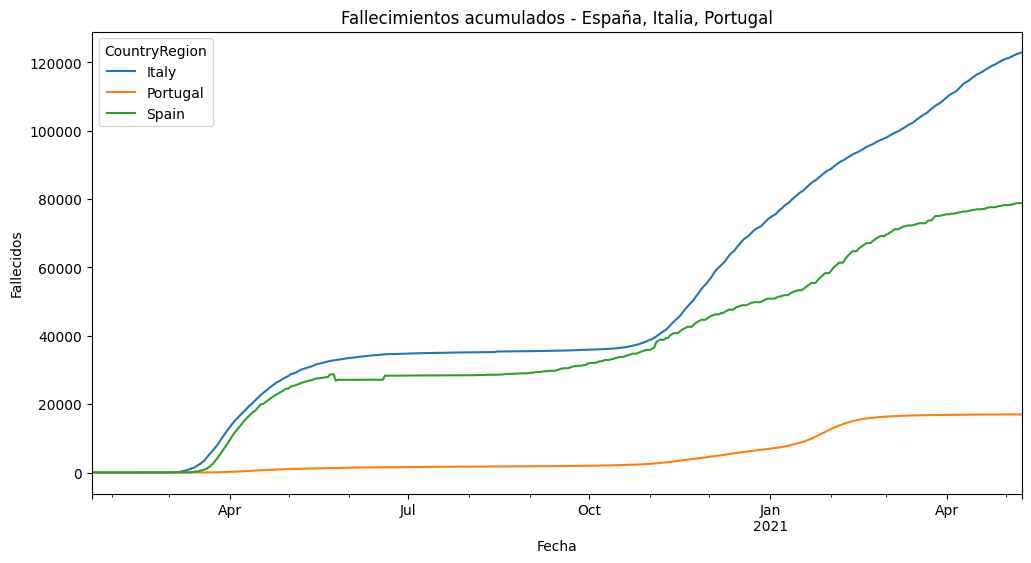

In [11]:
df_multi_wide.plot(
    figsize=(12, 6),
    x="Date",
    title="Fallecimientos acumulados - España, Italia, Portugal",
    xlabel="Fecha",
    ylabel="Fallecidos"
)

### Line plot `matplotlib`

In [12]:
df_multi.head()

,ProvinceState,CountryRegion,Lat,Long,Date,Confirmed,Recovered,Deaths
135,NaN,Italy,41.87,12.57,2020-01-22,0,0,0
192,NaN,Portugal,39.40,-8.22,2020-01-22,0,0,0
215,NaN,Spain,40.46,-3.75,2020-01-22,0,0,0
389,NaN,Italy,41.87,12.57,2020-01-23,0,0,0
446,NaN,Portugal,39.40,-8.22,2020-01-23,0,0,0


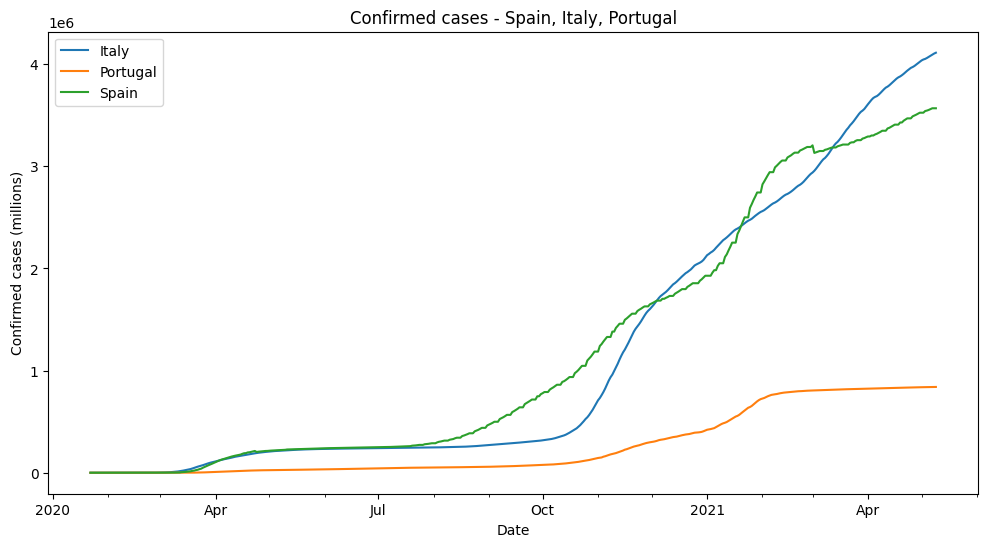

In [77]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6))

for label, group in df_multi.groupby("CountryRegion"):
    ax.plot(group.Date, group.Confirmed, label=label)

min_locator = mdates.MonthLocator()
locator = mdates.MonthLocator(interval=3)
formatter = mdates.ConciseDateFormatter(locator)

ax.set_title("Confirmed cases - Spain, Italy, Portugal")
ax.set_ylabel("Confirmed cases (millions)")
ax.set_xlabel("Date")

ax.xaxis.set_minor_locator(min_locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()

### Line plot `seaborn`

In [ ]:
# import matplotlib.pyplot as plt

In [13]:
df_multi.head(3)

,ProvinceState,CountryRegion,Lat,Long,Date,Confirmed,Recovered,Deaths
135,NaN,Italy,41.87,12.57,2020-01-22,0,0,0
192,NaN,Portugal,39.40,-8.22,2020-01-22,0,0,0
215,NaN,Spain,40.46,-3.75,2020-01-22,0,0,0


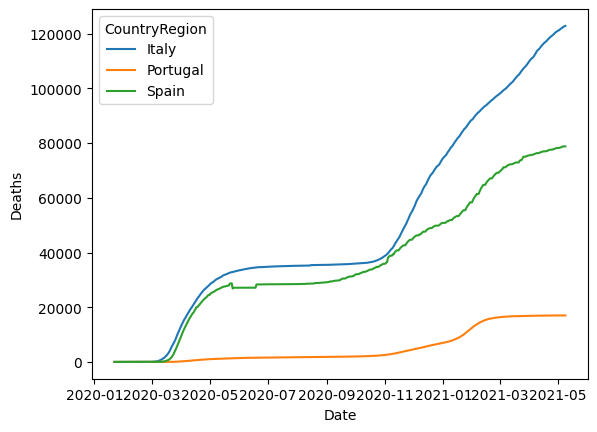

In [15]:
# import seaborn as sns

sns.lineplot(data = df_multi, x = "Date", y = "Deaths", hue = "CountryRegion");

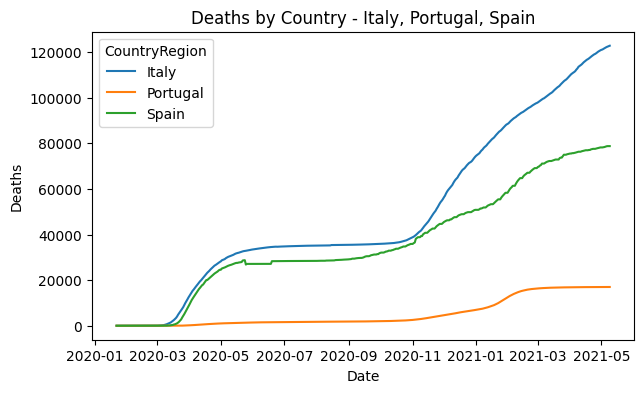

In [18]:
fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(data=df_multi, x="Date", y="Deaths", hue="CountryRegion", ax = ax)
ax.set_title("Deaths by Country - Italy, Portugal, Spain");

### Line plot `plotly.express`

In [21]:
pio.templates

Templates configuration
-----------------------
    Default template: 'simple_white'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [32]:
fig = px.line(df_multi, x = "Date", y = "Deaths", color = "CountryRegion", height = 400, width = 700)
fig.show()

In [28]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = "simple_white"

fig = px.line(data_frame=df_multi, x="Date", y="Deaths", color="CountryRegion", height = 300)
fig.show()

## Bar plot

In [40]:
filter_date.date()

datetime.date(2021, 5, 9)

<Axes: ylabel='CountryRegion'>

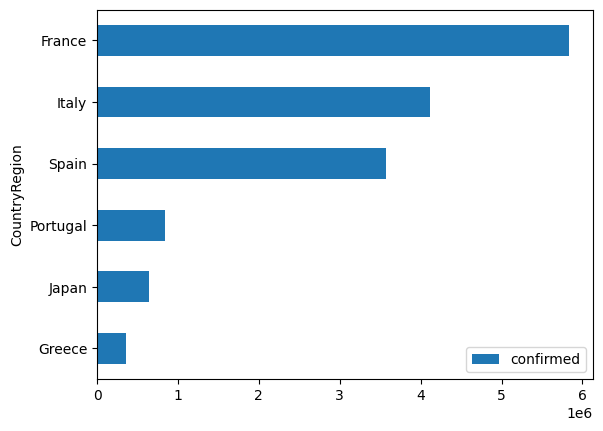

In [53]:
filter_date = df_full.Date.max()
lista_paises = ['Spain', 'Greece', 'Portugal', 'France', 'Italy', 'Japan']

df_bar = df_full.loc[lambda x: (x.Date == filter_date) & (x.CountryRegion.isin(lista_paises))]

df_bar = df_bar.groupby(['CountryRegion'], as_index=False)\
    .agg(confirmed = ("Confirmed", "sum")).sort_values("confirmed", ascending=True)

df_bar.plot(x = "CountryRegion", y = "confirmed", kind = "bar") #ascending = False
df_bar.plot(x = "CountryRegion", y = "confirmed", kind = "barh") #ascending = True

In [80]:
filter_date = df_full.Date == df_full.Date.max()
filter_countries = df_full.CountryRegion.isin(["Italy", "France", "Portugal", "Spain", "Greece"])

df_bar = df_full.loc[(filter_date) & (filter_countries), ["Date", "CountryRegion", "Confirmed"]]

In [81]:
df_bar_agg = df_bar.groupby("CountryRegion")[["Confirmed"]].sum().reset_index().sort_values("Confirmed")

In [82]:
df_bar_agg

,CountryRegion,Confirmed
1,Greece,362004
3,Portugal,839582
4,Spain,3567408
2,Italy,4111210
0,France,5838294


### Bar plot `pandas`

NameError: name 'df_bar_agg' is not defined

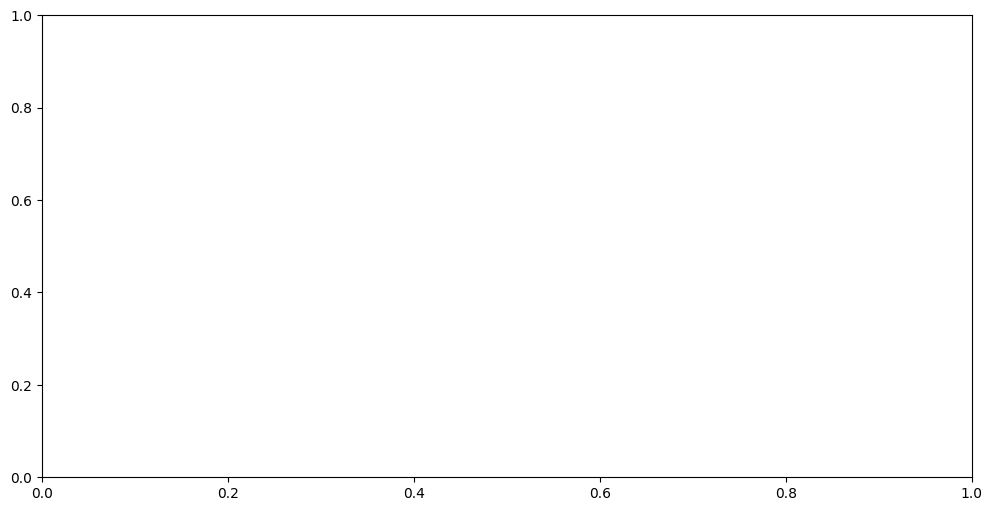

In [58]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(12, 6))

df_bar_agg.plot(
    kind="barh",
    y="Confirmed",
    x="CountryRegion",
    title="Casos acumulados por país -- 9 de Mayo de 2021",
    ax=ax,
    legend=None
)

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel("Casos confirmados")
ax.set_ylabel("País")

### Bar plot `matplotlib`

Text(0, 0.5, 'País')

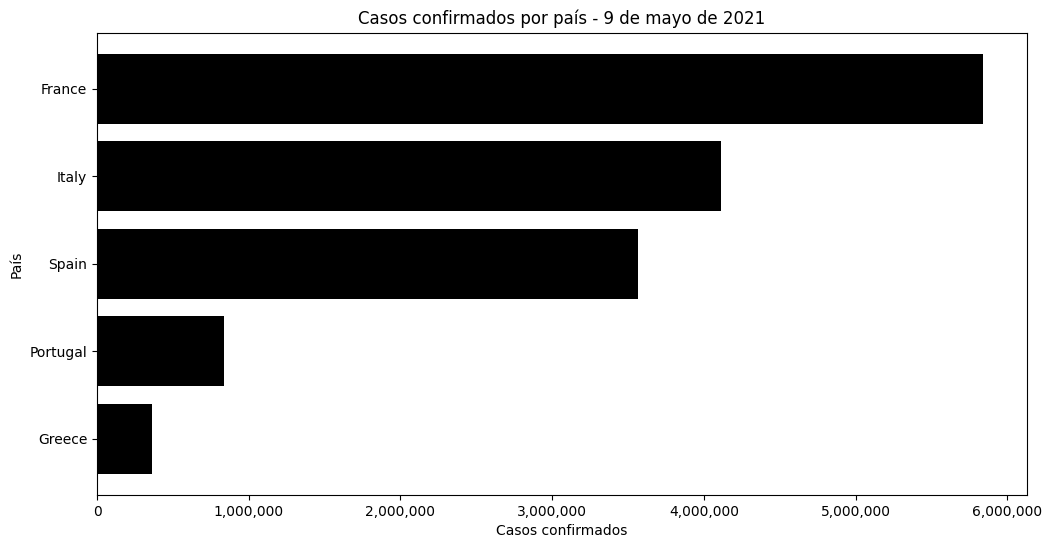

In [84]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(df_bar_agg.CountryRegion, df_bar_agg.Confirmed, color="black")

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title("Casos confirmados por país - 9 de mayo de 2021")
ax.set_xlabel("Casos confirmados")
ax.set_ylabel("País")

### Bar plot `seaborn`

In [55]:
df_bar.sample(frac = 1)

,CountryRegion,confirmed
1,Greece,362004
4,Portugal,839582
0,France,5838294
5,Spain,3567408
2,Italy,4111210
3,Japan,642146


Text(0, 0.5, 'País')

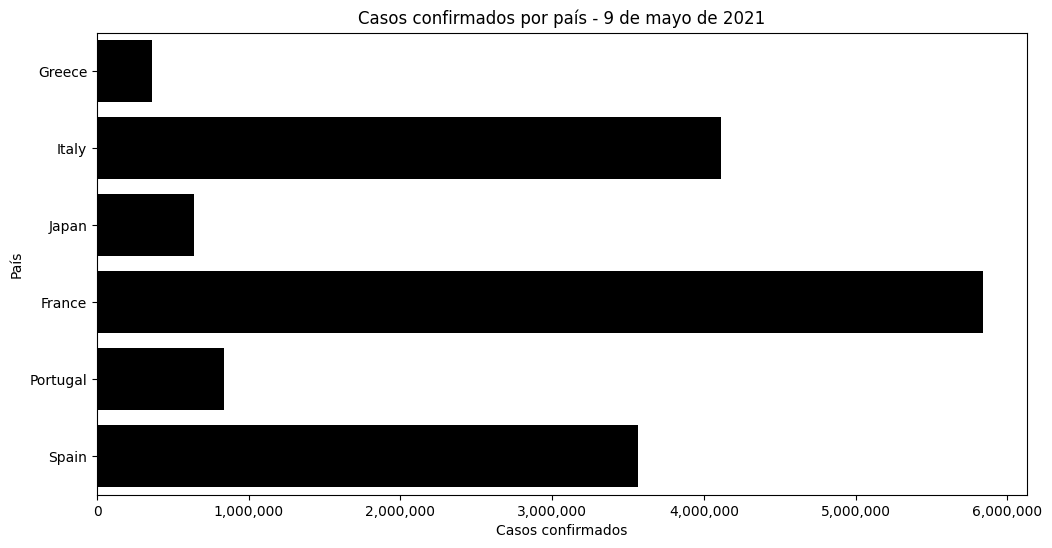

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    # data=df_bar.sort_values("Confirmed", ascending=False), 
    data=df_bar.sample(frac = 1), 
    x="confirmed", 
    y="CountryRegion", 
    ax=ax, 
    color="black"
)

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title("Casos confirmados por país - 9 de mayo de 2021")
ax.set_xlabel("Casos confirmados")
ax.set_ylabel("País")

### Bar plot `plotly.express`

In [64]:
# fig = px.bar(data_frame=df_bar_agg, x="Confirmed", y="CountryRegion")
fig = px.bar(data_frame=df_bar, y="confirmed", x="CountryRegion", orientation='v')
fig = px.bar(data_frame=df_bar, x="confirmed", y="CountryRegion", orientation='h')
fig.show()

## Stacked bar plot

In [82]:
from datetime import datetime

filter_dates = df_full.Date.between(datetime(2020, 12, 25), datetime(2021, 1, 1))
filter_countries = df_full.CountryRegion.isin(["Spain", "Italy", "Portugal", "Greece"])

# df_full.loc[(filter_dates) & (filter_countries)]

df_stacked = (
    df_full
    .loc[(filter_dates) & (filter_countries),
        ["Date", "CountryRegion", "Deaths"]]
    .copy()
)


df_stacked = df_stacked.set_index(["CountryRegion", "Date"]).sort_index()

df_stacked["DailyDeaths"] = df_stacked["Deaths"] - df_stacked.groupby("CountryRegion")["Deaths"].shift(1)

df_stacked = df_stacked.reset_index().dropna()

In [83]:
df_stacked.head(8)

,CountryRegion,Date,Deaths,DailyDeaths
1,Greece,2020-12-26,4553,46.00
2,Greece,2020-12-27,4606,53.00
3,Greece,2020-12-28,4672,66.00
4,Greece,2020-12-29,4730,58.00
5,Greece,2020-12-30,4788,58.00
6,Greece,2020-12-31,4838,50.00
7,Greece,2021-01-01,4881,43.00
9,Italy,2020-12-26,71620,261.00


### Stacked bar plot `pandas`

In [84]:
df_pivot = df_stacked.pivot(index="Date", columns="CountryRegion", values="DailyDeaths").reset_index()
df_pivot

CountryRegion,Date,Greece,Italy,Portugal,Spain
0,2020-12-26,46.00,261.00,78.00,0.00
1,2020-12-27,53.00,305.00,63.00,0.00
2,2020-12-28,66.00,445.00,58.00,298.00
3,2020-12-29,58.00,659.00,74.00,320.00
4,2020-12-30,58.00,575.00,79.00,247.00
5,2020-12-31,50.00,555.00,76.00,148.00
6,2021-01-01,43.00,462.00,66.00,0.00


In [86]:
# https://stackoverflow.com/questions/64342716/pandas-bar-plot-combined-with-line-plot-shows-the-time-axis-beginning-at-1970
df_pivot["Date"] = df_pivot.Date.dt.strftime("%d-%m-%Y")

<Axes: xlabel='Date'>

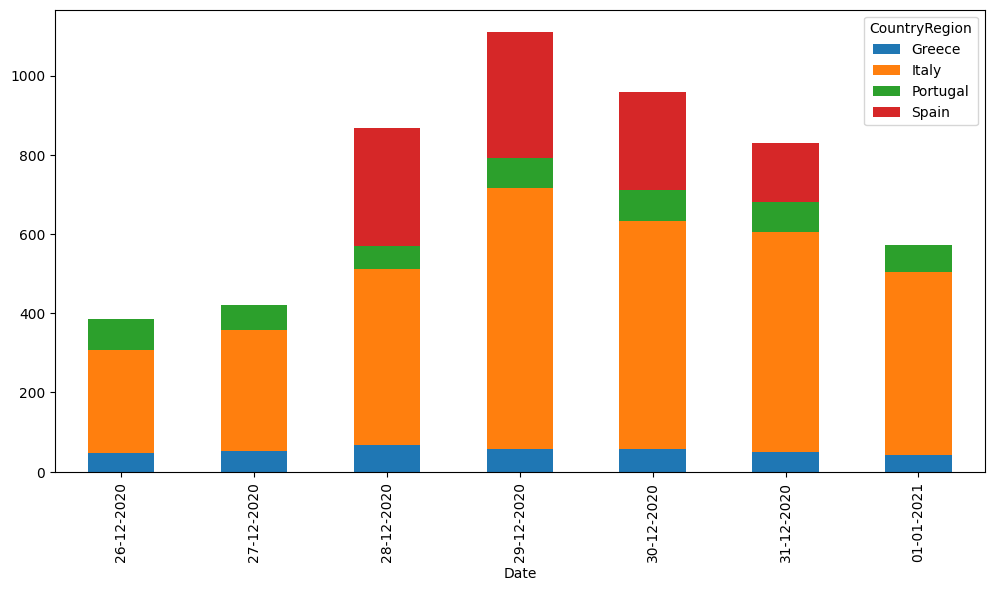

In [87]:
df_pivot.plot(kind="bar", x="Date", stacked=True, figsize=(12, 6))

### Stacked bar plot `matplotlib`

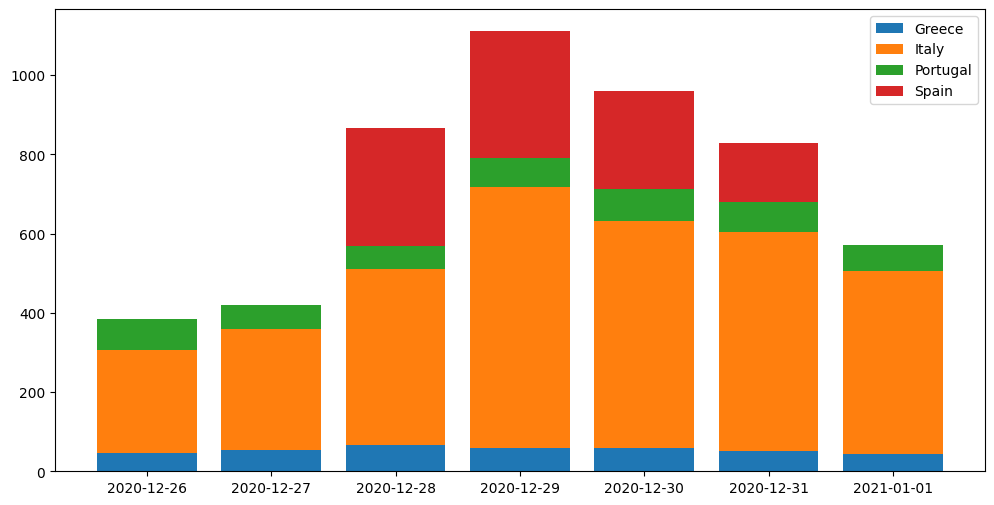

In [92]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

bottom = np.zeros(df_stacked.Date.nunique())

for label, group in df_stacked.groupby("CountryRegion"):
    ax.bar(group.Date, group.DailyDeaths, label=label, bottom=bottom)
    bottom += group.DailyDeaths.values

ax.legend()

### Stacked bar plot `seaborn`

In [88]:
df_stacked.head()

,CountryRegion,Date,Deaths,DailyDeaths
1,Greece,2020-12-26,4553,46.00
2,Greece,2020-12-27,4606,53.00
3,Greece,2020-12-28,4672,66.00
4,Greece,2020-12-29,4730,58.00
5,Greece,2020-12-30,4788,58.00


Text(0.5, 1.0, 'Daily deaths by Country')

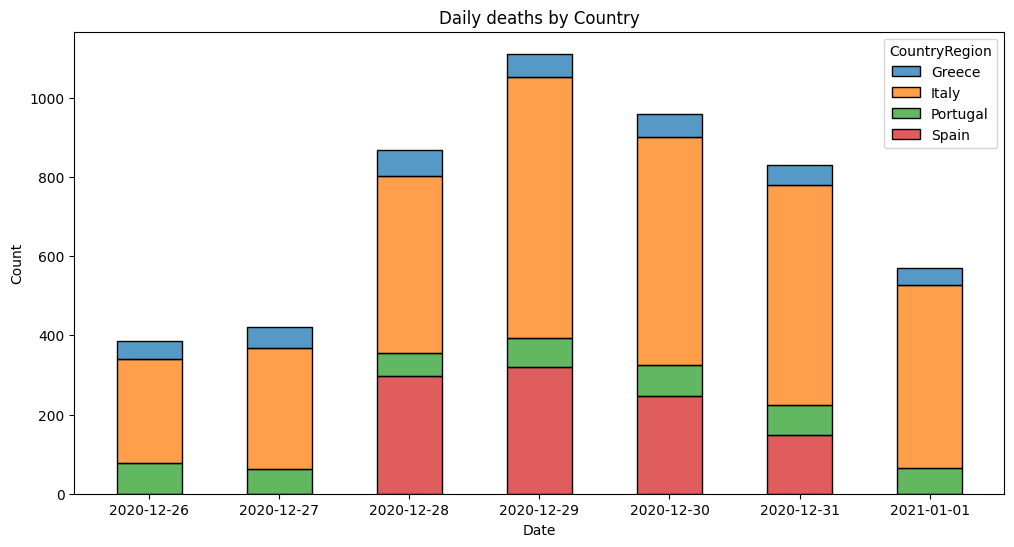

In [89]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=df_stacked, 
             x="Date", 
             hue="CountryRegion", 
             weights="DailyDeaths", 
             discrete=True, 
             shrink=0.5,
             multiple="stack")

ax.set_title("Daily deaths by Country")

### Stacked bar plot `plotly.express`

In [90]:
df_stacked.head()

,CountryRegion,Date,Deaths,DailyDeaths
1,Greece,2020-12-26,4553,46.00
2,Greece,2020-12-27,4606,53.00
3,Greece,2020-12-28,4672,66.00
4,Greece,2020-12-29,4730,58.00
5,Greece,2020-12-30,4788,58.00


In [91]:
fig = px.bar(data_frame=df_stacked, x="Date", y="DailyDeaths", color="CountryRegion")
fig.show()

### Facets `plotly_express`

In [95]:
fig = px.bar(data_frame=df_stacked, x="Date", y="DailyDeaths", facet_col="CountryRegion")
fig.show()

## Histogram

In [96]:
df_spain = df_full.loc[df_full.CountryRegion == "Spain", ["Date", "Deaths"]].copy()
df_spain = df_spain.set_index(["Date"]).sort_index()

df_spain["DailyDeaths"] = df_spain["Deaths"] - df_spain["Deaths"].shift()
df_spain = df_spain.reset_index().dropna()

### Histogram `pandas`

<Axes: title={'center': 'Distribución de muertes diarias por COVID19 - España'}, ylabel='Frequency'>

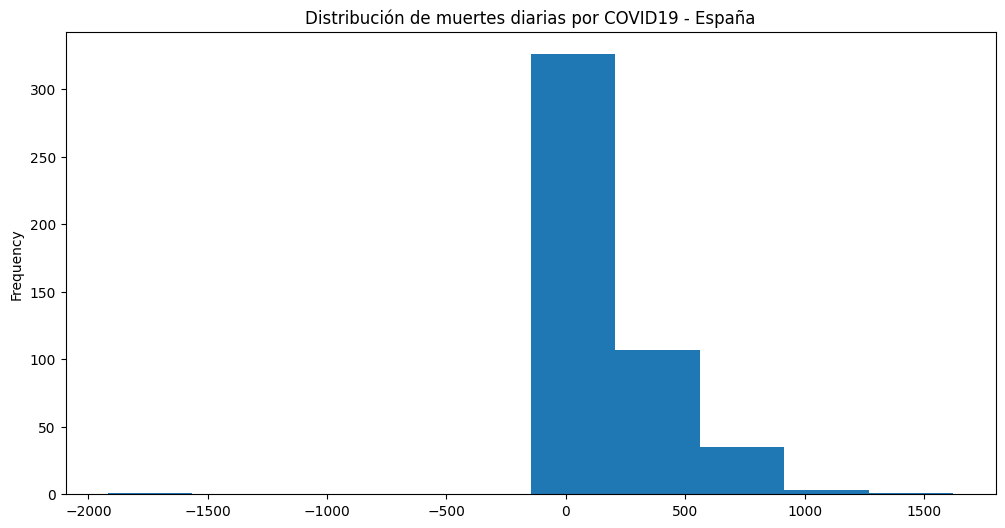

In [97]:
df_spain.plot(
    kind="hist", 
    y="DailyDeaths", 
    legend=None, 
    figsize=(12, 6), 
    title="Distribución de muertes diarias por COVID19 - España"
)

### Histogram `matplotlib`

Text(0.5, 1.0, 'Distribución de muertes diarias por COVID19 - España')

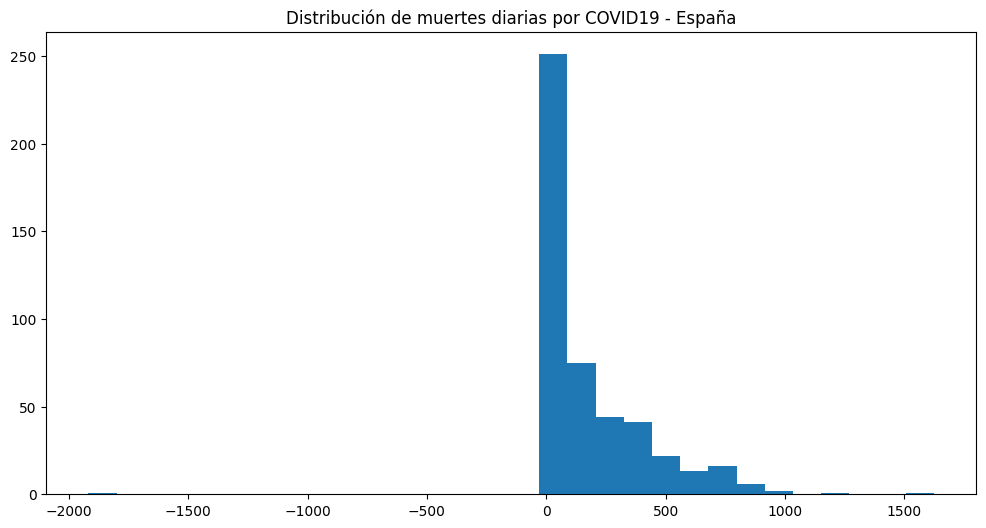

In [98]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(df_spain.DailyDeaths, bins=30)
ax.set_title("Distribución de muertes diarias por COVID19 - España")

### Histogram `seaborn`

Text(0.5, 1.0, 'Distribución de muertes diarias por COVID19 - España')

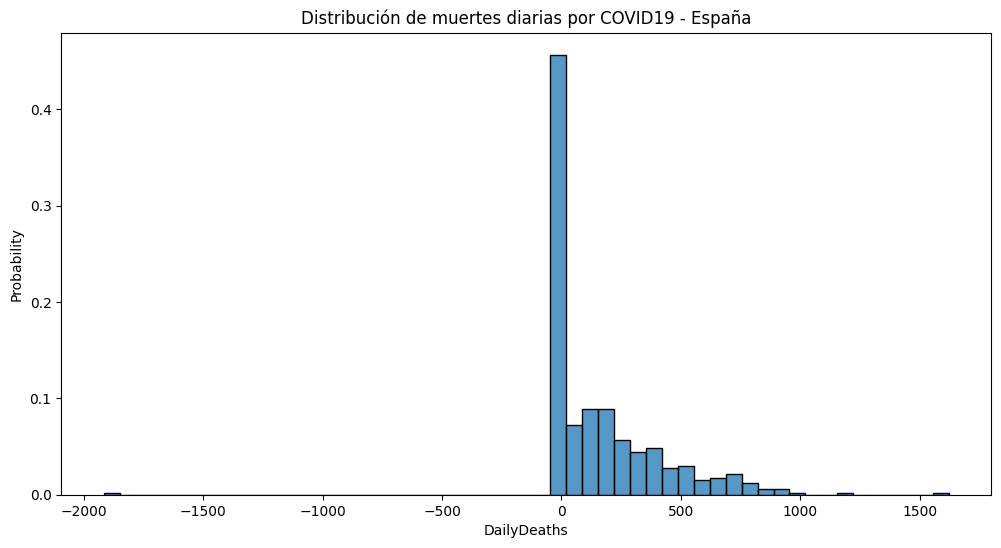

In [99]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=df_spain, x="DailyDeaths", stat="probability", ax=ax)
ax.set_title("Distribución de muertes diarias por COVID19 - España")

### Histogram `plotly.express`

In [100]:
fig = px.histogram(data_frame=df_spain, x="DailyDeaths", histnorm="percent")
fig.show()

### Subplots with `plotly`

In [101]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=["Spain", "Italy"])

df_multi_hist = df_full.loc[
    df_full.CountryRegion.isin(["Spain", "Italy"]), 
    ["CountryRegion", "Date", "Deaths"]
].copy()
df_multi_hist = df_multi_hist.set_index(["CountryRegion", "Date"]).sort_index()

df_multi_hist["DailyDeaths"] = (
    df_multi_hist["Deaths"] - df_multi_hist.groupby("CountryRegion")["Deaths"].shift()
)
df_multi_hist = df_multi_hist.reset_index().dropna()

data_spain = df_multi_hist.query("CountryRegion == 'Spain'").DailyDeaths
data_italy = df_multi_hist.query("CountryRegion == 'Italy'").DailyDeaths

fig.add_trace(
    go.Histogram(x=data_spain, name="Spain", marker_color="black"),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=data_italy, name="Italy", marker_color="black"),
    row=1, col=2,
)
fig.update_layout(title="Distribution of Daily Deaths", showlegend=False, yaxis_title="Frequency")
fig.show()

## Scatter plot

In [102]:
filter_date = df_full.Date == df_full.Date.max()

df_scatter = df_full.loc[filter_date, ["CountryRegion", "Confirmed", "Deaths"]].copy()
df_scatter = df_scatter.groupby("CountryRegion").sum().reset_index()

In [103]:
df_scatter

,CountryRegion,Confirmed,Deaths
0,Afghanistan,61842,2686
1,Albania,131723,2412
2,Algeria,124104,3328
3,Andorra,13423,127
4,Angola,28740,633
...,...,...,...
183,Vietnam,3412,35
184,West Bank and Gaza,301751,3358
185,Yemen,6482,1271
186,Zambia,92092,1257


In [104]:
df_scatter[df_scatter.Confirmed == df_scatter.Confirmed.max()]

,CountryRegion,Confirmed,Deaths
174,US,32707750,581754


In [105]:
df_scatter_sin_out = (
    df_scatter[
        (df_scatter.Confirmed < 1e7)
        & (df_scatter.Deaths < 400_000)
    ]
)

### Scatter plot `pandas`

<Axes: xlabel='Confirmed', ylabel='Deaths'>

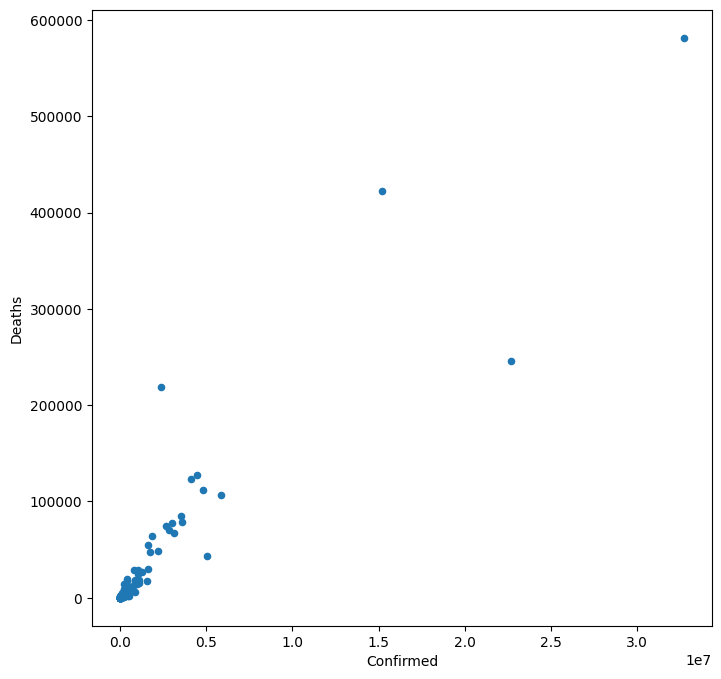

In [106]:
df_scatter.plot(kind="scatter", x="Confirmed", y="Deaths", figsize=(8, 8))

array([[<Axes: title={'center': 'Confirmed'}>,
        <Axes: title={'center': 'Deaths'}>]], dtype=object)

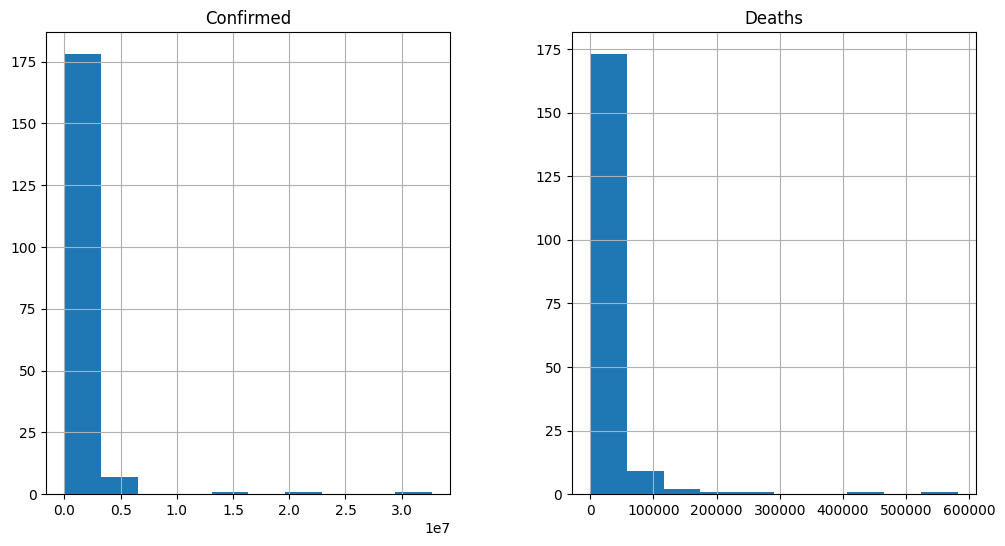

In [107]:
df_scatter.hist(figsize=(12, 6))

In [108]:
df_scatter[df_scatter.Confirmed == df_scatter.Confirmed.max()]

,CountryRegion,Confirmed,Deaths
174,US,32707750,581754


In [109]:
df_scatter_no_outlier = df_scatter[(df_scatter.Confirmed < 1e7) & (df_scatter.Deaths < 400000)]

<Axes: xlabel='Confirmed', ylabel='Deaths'>

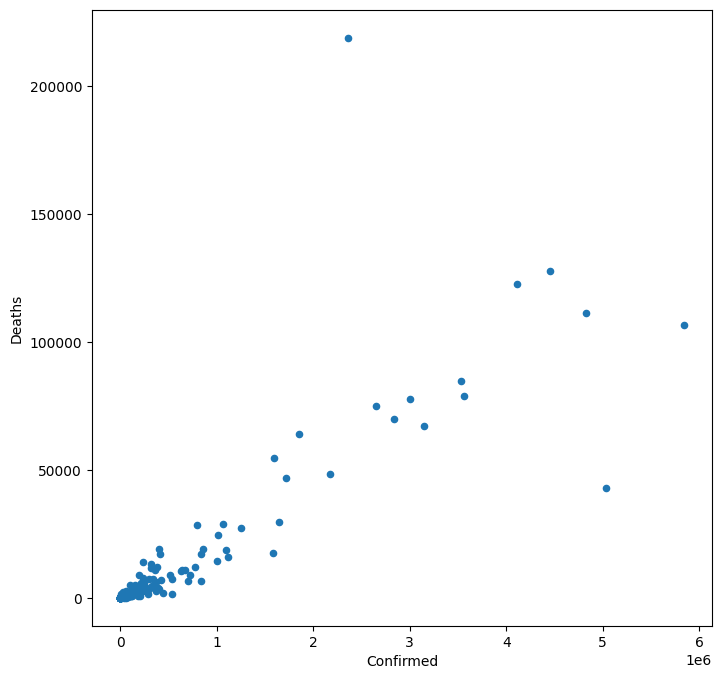

In [110]:
df_scatter_no_outlier.plot(kind="scatter", x="Confirmed", y="Deaths", figsize=(8, 8))

### Scatter plot `matplotlib`

Text(0.5, 1.0, 'Casos confirmados vs. Muertes')

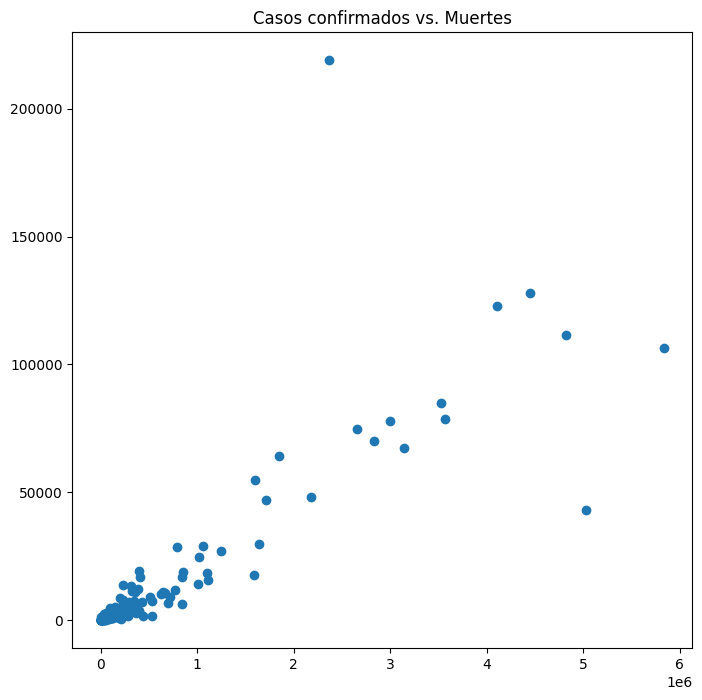

In [111]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(df_scatter_no_outlier.Confirmed, df_scatter_no_outlier.Deaths)
ax.set_title("Casos confirmados vs. Muertes")

### Scatter plot `seaborn`

<Axes: xlabel='Confirmed', ylabel='Deaths'>

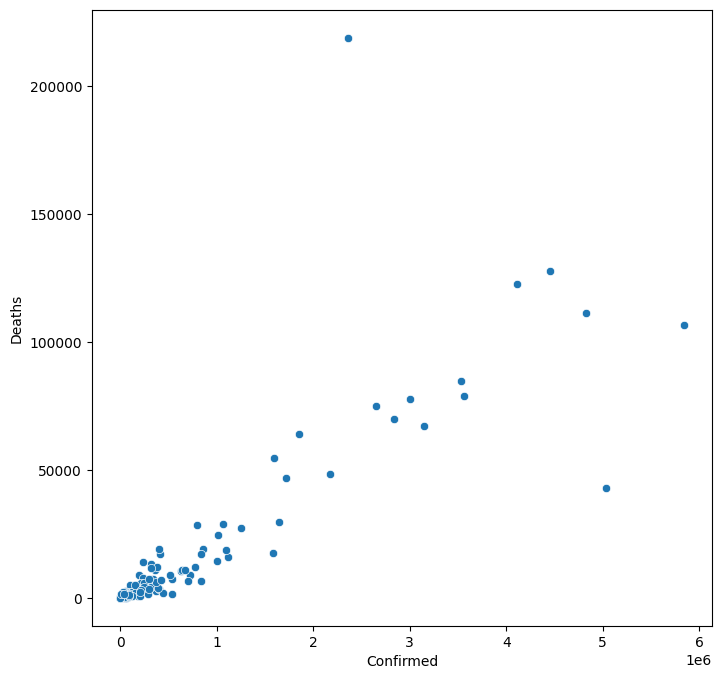

In [112]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=df_scatter_no_outlier, x="Confirmed", y="Deaths", ax=ax)

### Scatter plot `plotly.express`

In [113]:
fig = px.scatter(data_frame=df_scatter_no_outlier, x="Confirmed", y="Deaths", width=600, height=600)
fig.show()

## Pie/Donut chart

In [114]:
filter_countries = df_full.CountryRegion.isin(["Italy", "Greece", "Portugal", "Spain"])
filter_date = df_full.Date == df_full.Date.max()

df_donut = df_full.loc[
    (filter_countries)
    & (filter_date),
    ["CountryRegion", "Confirmed"]
].copy()
df_donut.head()

,CountryRegion,Confirmed
120260,Greece,362004
120277,Italy,4111210
120334,Portugal,839582
120357,Spain,3567408


### Pie/Donut chart `pandas` and `matplotlib`

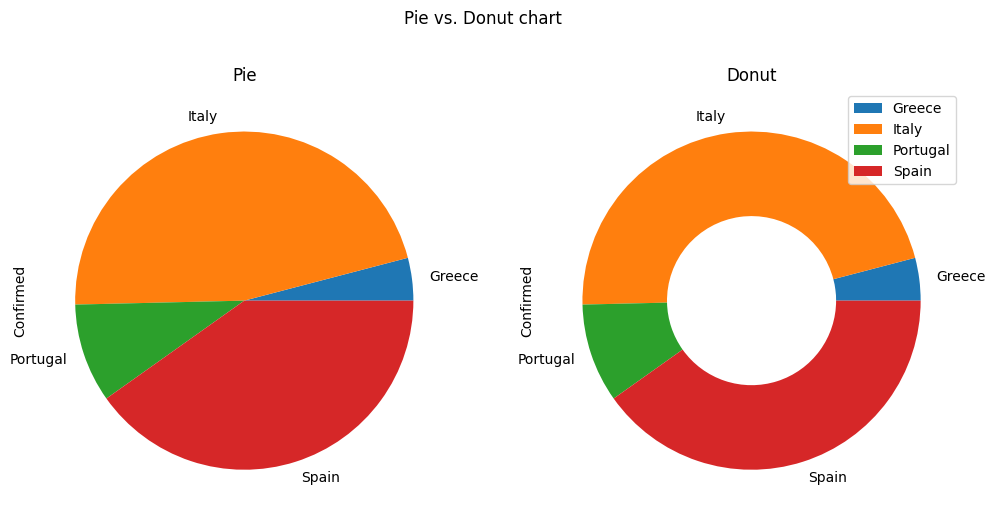

In [115]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

df_donut.set_index("CountryRegion").plot(kind="pie", y="Confirmed", ax=ax[0], title="Pie")
df_donut.set_index("CountryRegion").plot(kind="pie", y="Confirmed", ax=ax[1], wedgeprops=dict(width=0.5), title="Donut")

fig.suptitle("Pie vs. Donut chart")
fig.set_facecolor("white")
ax[0].get_legend().remove()

### Pie/Donut chart `plotly.express`

In [116]:
fig = px.pie(data_frame=df_donut, values="Confirmed", names="CountryRegion", hole=0.5)
fig.show()

## Other

### Treemap `plotly.express`

In [117]:
filter_countries = df_full.CountryRegion.isin(["China", "Australia"])
filter_date = df_full.Date == df_full.Date.max()

df_treemap = df_full.loc[
    (filter_countries) & (filter_date),
    ["ProvinceState", "CountryRegion", "Confirmed"]
]
df_treemap.head()

,ProvinceState,CountryRegion,Confirmed
120150,Australian Capital Territory,Australia,124
120151,New South Wales,Australia,5538
120152,Northern Territory,Australia,167
120153,Queensland,Australia,1580
120154,South Australia,Australia,740


In [118]:
fig = px.treemap(data_frame=df_treemap, path=["CountryRegion", "ProvinceState"], values="Confirmed")
fig.show()

### Map `folium`

In [119]:
import folium

cols = ["Lat", "Long", "ProvinceState", "CountryRegion", "Confirmed"]
filter_date = df_full.Date == df_full.Date.max()
filter_latlong = (df_full.Lat.notna()) & (df_full.Long.notna())

df_folium = df_full[(filter_date) & (filter_latlong)][cols].copy()
df_folium.head()

,Lat,Long,ProvinceState,CountryRegion,Confirmed
120142,33.94,67.71,NaN,Afghanistan,61842
120143,41.15,20.17,NaN,Albania,131723
120144,28.03,1.66,NaN,Algeria,124104
120145,42.51,1.52,NaN,Andorra,13423
120146,-11.20,17.87,NaN,Angola,28740


In [120]:
df_folium["ProvinceState"] = df_folium["ProvinceState"].fillna("")

In [121]:
covid_map = folium.Map(location=[0, 0], tiles="cartodbpositron", zoom_start=2)

for idx, row in df_folium.iterrows():
    folium.Circle(
        location=(row["Lat"], row["Long"]),
        radius=row["Confirmed"] ** 0.75,
        fill=False,
        fill_opacity=1,
        color="red",
        tooltip=f"""
        <ul>
            <li>Country: {row["CountryRegion"]}</li>
            <li>Province/State: {row["ProvinceState"]}</li>
            <li>Confirmed cases: {row["Confirmed"]}</li>
        <ul>
        """
    ).add_to(covid_map)
covid_map

### Tables `pandas`

In [122]:
list_countries = np.random.choice(df_full.CountryRegion.unique(), 10)
filter_countries = df_full.CountryRegion.isin(list_countries)

In [123]:
df_table = df_full.loc[filter_countries, ["Date", "CountryRegion", "Confirmed"]].copy()
df_table = df_table.groupby(["Date", "CountryRegion"]).sum().reset_index()
df_table.head()

,Date,CountryRegion,Confirmed
0,2020-01-22,Bosnia and Herzegovina,0
1,2020-01-22,China,542
2,2020-01-22,Cote d'Ivoire,0
3,2020-01-22,Cuba,0
4,2020-01-22,France,0


In [124]:
df_pivot = df_table.pivot(index="Date", columns="CountryRegion", values="Confirmed")

In [125]:
df_pivot.corr().style.background_gradient(cmap="RdYlBu")

CountryRegion,Bosnia and Herzegovina,China,Cote d'Ivoire,Cuba,France,Germany,Guinea,Lithuania,Qatar,Slovakia
CountryRegion,,,,,,,,,,
Bosnia and Herzegovina,1.000000,0.554346,0.930233,0.886176,0.995979,0.987664,0.926416,0.971255,0.828532,0.978626
China,0.554346,1.000000,0.625128,0.439123,0.545463,0.543219,0.653004,0.508379,0.673805,0.512367
Cote d'Ivoire,0.930233,0.625128,1.000000,0.855513,0.924034,0.906892,0.985842,0.870235,0.947008,0.894599
Cuba,0.886176,0.439123,0.855513,1.000000,0.912623,0.909752,0.796496,0.886019,0.682987,0.916426
France,0.995979,0.545463,0.924034,0.912623,1.000000,0.990689,0.913633,0.973001,0.810344,0.986160
Germany,0.987664,0.543219,0.906892,0.909752,0.990689,1.000000,0.889065,0.993774,0.789020,0.994636
Guinea,0.926416,0.653004,0.985842,0.796496,0.913633,0.889065,1.000000,0.847572,0.971340,0.867157
Lithuania,0.971255,0.508379,0.870235,0.886019,0.973001,0.993774,0.847572,1.000000,0.742230,0.992360
Qatar,0.828532,0.673805,0.947008,0.682987,0.810344,0.789020,0.971340,0.742230,1.000000,0.757029
